Desafío realizado por Cristóbal Novoa

# Desafío - Boosting Classifiers

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo
Desafío - Boosting Classifiers.

# Requerimientos

Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una
compañía de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El
vector objetivo a modelar es la tasa de rotación entre los clientes de una compañía de
telecomunicaciones churn. Los atributos existentes hacen referencia a características de la
cuenta de cada cliente.

Lista de atributos:

● State: Estado de Estados Unidos.

● Account Length: Tiempo en que la cuenta ha sido activada.

● Area Code: Código de área.

● International plan: Plan internacional activado.

● Voice mail plan: Plan de mensajes de voz activado.

● number_vmail_messages: Cantidad de mensajes de voz.

● total_day_minutes: Cantidad de minutos ocupados en la mañana.

● total_day_calls: Cantidad de llamadas realizadas en la mañana.

● total_day_charge: Cobros realizados en la mañana.

● total_eve_minutes: Cantidad de minutos ocupados en la tarde.

● total_eve_calls: Cantidad de llamadas realizadas en la tarde.

● total_eve_charge: Cobros realizados en la tarde.

● total_night_calls: Cantidad de llamadas realizadas en la noche.

● tota_night_minutes: Cantidad de minutos ocupados en la noche.

● total_night_charge: Cobros realizados en la noche.

● total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales.

● total_intl_calls: Cantidad de llamadas internacionales realizadas.

● total_intl_charge: Cobros realizados por llamadas internacionales.

● churn: 1 si el cliente se cambió de compañía, 0 de los contrario.

Los datos provienen del paquete AppliedPreditiveModeling de R.

# Ejercicio 1: Preprocesamiento

● Grafique el comportamiento distributivo de los atributos y de la variable dependiente.
Reporte brevemente el comportamiento de las variables.

● En base al comportamiento de los atributos, considere si es necesario implementar
alguna recodificación o transformación de atributo. Algunas normas a seguir:

○ Para las variables categóricas, recodifíquelas en variables binarias.

○ Para aquellas variables numéricas que presenten alto sesgo, pueden
transformarlas con su logaritmo.

In [99]:
%config IPCompleter.greedy = True

In [100]:
#Importacion de librerias
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

In [101]:
#Se carga csv
train= pd.read_csv('churn_train.csv').drop(['Unnamed: 0'], axis=1)

In [102]:
train.shape

(3333, 20)

In [103]:
#Se muestra csv cargado
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [104]:
#Se muestran las caracteristicas descriptivas de la data
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [105]:
#Se muestran los valores nulos en el csv
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

No hay valores nulos en el csv

In [110]:
def charts(df):
    rows = df.shape[1] 
    plt.figure(figsize=(20,80))
    for index, (colname, serie) in enumerate(df.iteritems()):
        plt.subplot(rows, 2, index + 1)
        if pd.api.types.is_float_dtype(serie) is True or pd.api.types.is_integer_dtype(serie) is True:
            sns.distplot(serie)
            plt.axvline(np.mean(serie), color='tomato',  lw = 2, linestyle='--', label = f'mean {serie}')
            plt.axvline(np.median(serie), color = 'Darkblue', lw =2, linestyle='--', label = f'median {serie}')
            plt.legend(['mean','median'])
            
        elif pd.api.types.is_object_dtype(serie) is True:
            
            sns.countplot(serie)
            plt.axhline(serie.value_counts().mean(), color='forestgreen', linestyle='--', lw = 2, 
                        label = f'mean {serie}')
            plt.legend(['mean'])
        plt.title(colname, fontsize=16)
        plt.tight_layout()

# EDA

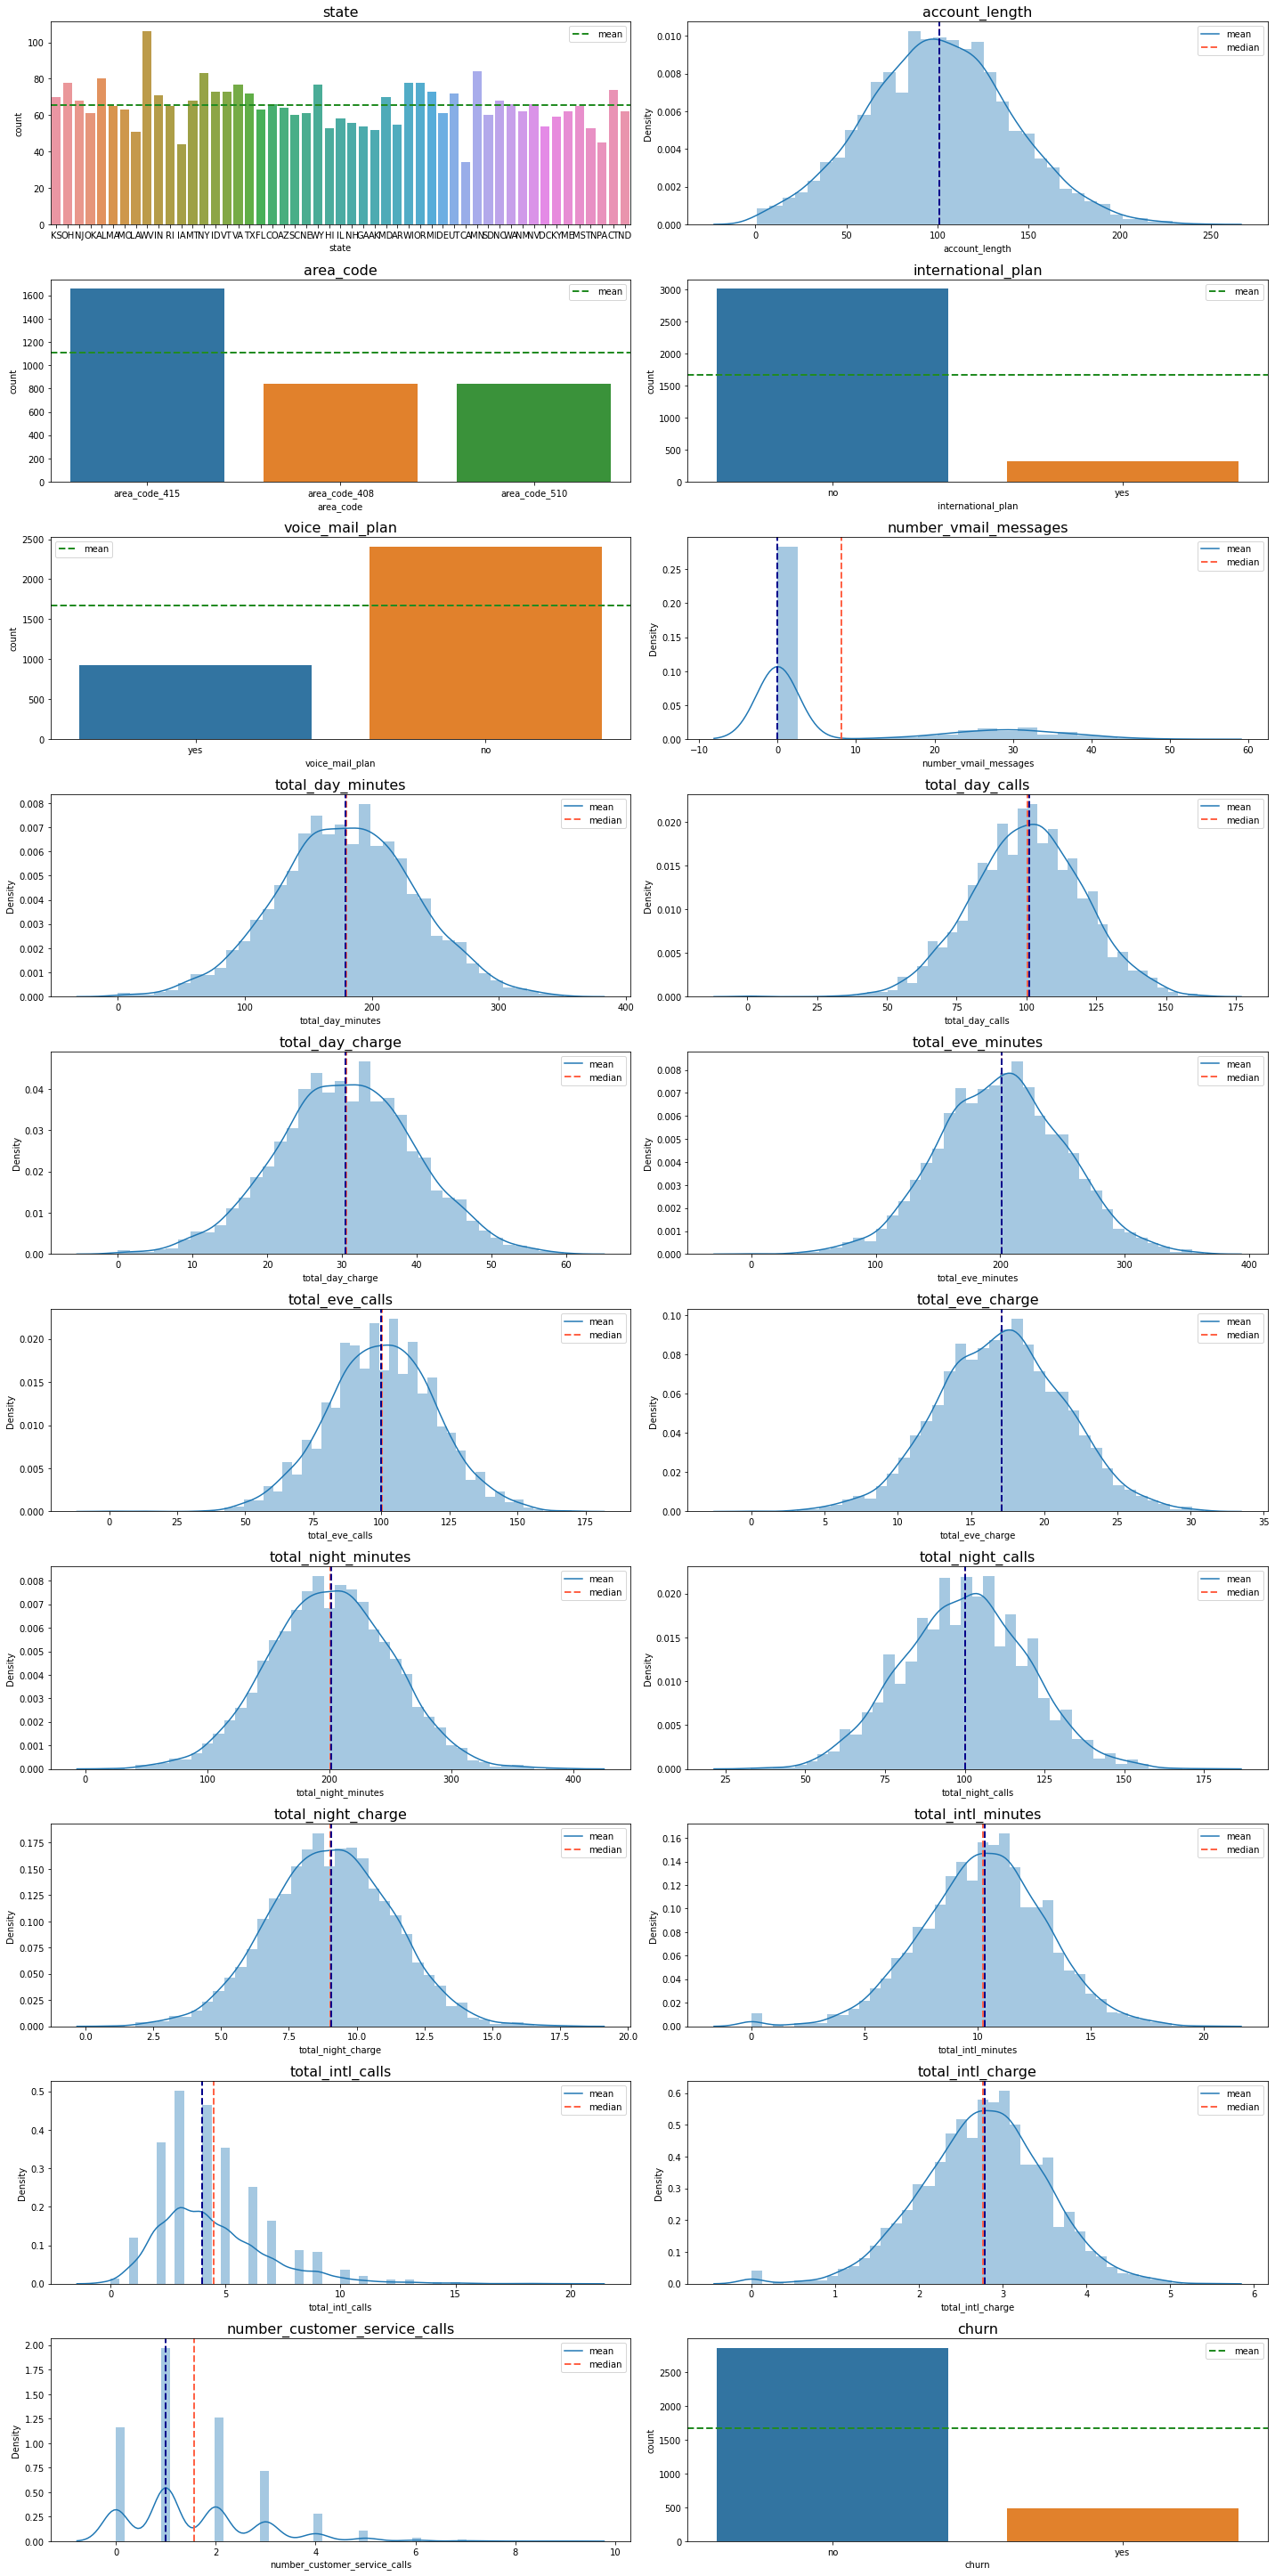

In [111]:
charts(train)

En su mayoria los atributos presentan distribuciones normales. La variable objetivo churn presenta pocos datos relativos a si el cliente cambio de la compañia, lo que puede influir en los resultados.  

In [112]:
# Se genera lista con atributos a binarizar
lista_bin = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [113]:
#Se binarizan las columnas indicadas anteriormente
df_preproc = pd.get_dummies(train, columns = lista_bin, drop_first = True)

In [114]:
#Se muestra dataframe binarizado
df_preproc.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,1,0,0,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,1,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,0,1,0,0


# Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

● Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad
predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla
con las siguientes especificaciones:

|Modelo|Grilla|
|---|---|
|AdaBoostClassifier| {'learning_rate': [0.01, 0.1, 0.5] ,'n_estimators': [50,100, 500, 1000, 2000]}|
|GradientBoostingClassifier| {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50,100, 500, 1000,2000],'subsample': [0.1,0.5,0.9]}|

● Si el tiempo de computación es alto, puede implementar la búsqueda con 1
validación cruzada.

● Reporte las métricas para los mejores modelos.

In [115]:
#Se importan librerias
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [116]:
#Se separan muestras de entrenamiento y test. Luego se escala
X = df_preproc.loc[:, 'account_length':'voice_mail_plan_yes']
y = df_preproc['churn_yes']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 4982)
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [117]:
#Se indican los parametros para ingresar en la grilla
param_grid_ada = {'learning_rate': [0.01, 0.1, 0.5] ,'n_estimators': [50,100, 500, 1000, 2000]}
param_grid_gb = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50,100, 500, 1000,2000],
                    'subsample': [0.1,0.5,0.9]}

In [118]:
#Se aplica el gridsearch sobre AdaBoost
ada_grid = GridSearchCV(AdaBoostClassifier(),
param_grid = param_grid_ada,
cv=3, n_jobs= -1).fit(x_train_scaled, y_train)

In [119]:
#Se indica la mejor combinacion de hiperparametros para adaboost
ada_grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=2000)

In [120]:
#Se reportan las metricas para adaboost
y_hat_ada = ada_grid.best_estimator_.predict(x_test_scaled)
print(classification_report(y_test, y_hat_ada))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       927
           1       0.68      0.35      0.46       173

    accuracy                           0.87      1100
   macro avg       0.78      0.66      0.70      1100
weighted avg       0.86      0.87      0.85      1100



Se observa un mal desempeño en la prediccion de la clase 1

In [121]:
#Se aplica gridsearch al modelo con gradient boost
gb_grid = GridSearchCV(GradientBoostingClassifier(),
param_grid = param_grid_gb,
cv=3, n_jobs = -1).fit(x_train_scaled, y_train)

In [122]:
#Se indican la mejor combinacion de hiperparametros
gb_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000, 'subsample': 0.9}

In [123]:
#Se indica las metricas para gradient boosting
y_hat_gb = gb_grid.best_estimator_.predict(x_test_scaled)
print(classification_report(y_test, y_hat_gb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       927
           1       0.89      0.72      0.80       173

    accuracy                           0.94      1100
   macro avg       0.92      0.85      0.88      1100
weighted avg       0.94      0.94      0.94      1100



El modelo GradientBoosting tiene un mejor desempeño que AdaBoost, por lo que se procede a usar en el proximo ejercicio.

# Ejercicio 3: Principales factores asociados

● Con el mejor modelo, reporte la importancia relativa de los atributos y comente
cuáles son los que aumentan la probabilidad de fuga en los clientes.

Tip: Pueden implementar la función plot_importance que se encuentra en la lectura
de Bagging y Random Forest.

In [124]:
#Se entrena modelo con mejor combinacion de hiperparametros
gb_best = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.01, subsample =0.9,
                                 random_state=4982).fit(x_train_scaled, y_train)

In [125]:
#Se genera funcion plot_importance
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

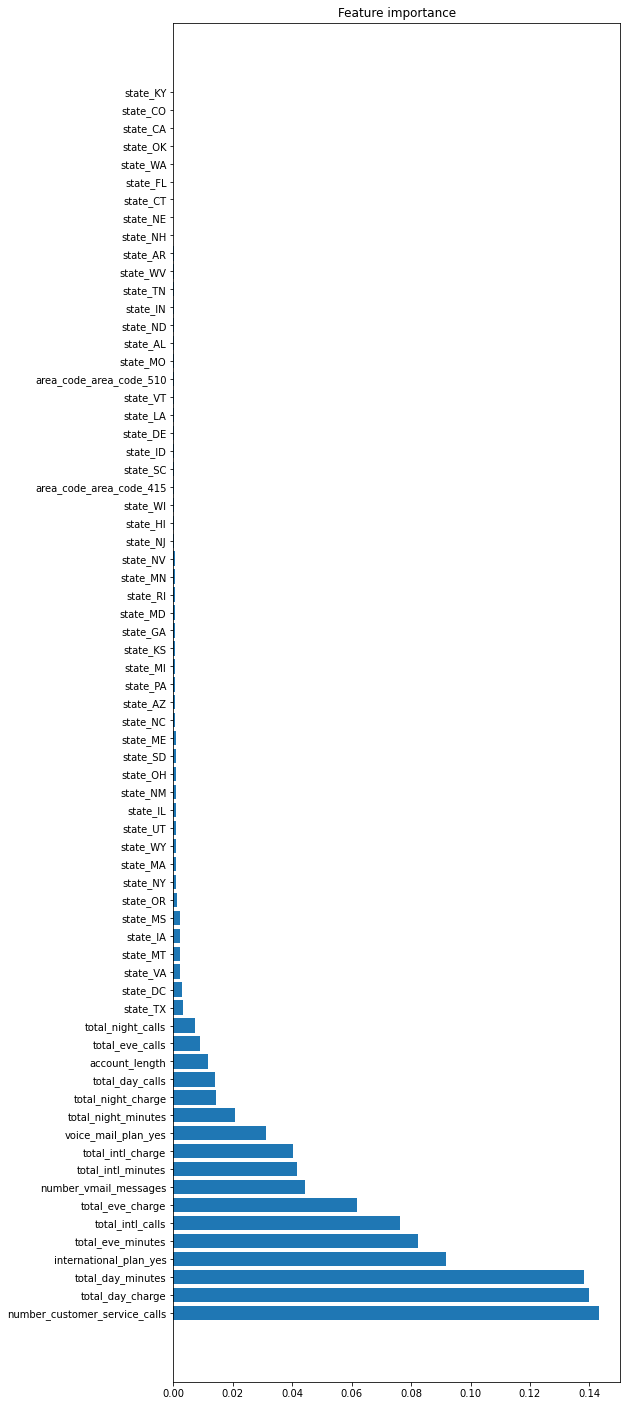

In [126]:
#Se aplica la funcion y se muestran los atributos mas importantes
plt.rcParams['figure.figsize'] = (8, 25)
plot_importance(gb_best, X.columns)

Los atributos que mas aumentan la probabilidad de fuga de los clientes son la cantidad total de llamadas en la mañana, la cantidad de mensajes de voz y la activacion del plan internacional. 

# Ejercicio 4: Probabilidad de fuga

● El gerente general necesita saber en qué estados hay una mayor probabilidad de
fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad
de fuga.

● Implemente el modelo predictivo con el archivo churn_test.csv.

● Recuerde que para obtener la probabilidad de clase, debe utilizar la función
predict_proba del modelo.

In [127]:
#Se carga el dataset churn_test.csv
test= pd.read_csv('churn_test.csv').drop(['Unnamed: 0'], axis=1)

In [128]:
#Se muestra test
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [129]:
#Se elimina churn de la muestra de testeo 
test.drop(['churn'], axis=1, inplace = True)

In [130]:
#Se indica lista con variables a binarizar en el dataset
lista_test = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [131]:
#Se binarizan las variables indicadas
test_preproc = pd.get_dummies(test, columns = lista_test, drop_first = True)

In [132]:
#Se estandariza y escala el dataframe para poder entrenar
scaler = StandardScaler().fit(test_preproc)
test_preproc_scaled = scaler.transform(test_preproc)

In [133]:
#Se generan las predicciones
probs_fuga = gb_best.predict_proba(test_preproc_scaled)

In [134]:
#Se genera lista para quedarnos con las probabilidades de fuga de clientes
lista_prob = []
for i in probs_fuga:
    lista_prob.append(i[1])

In [135]:
#Se genera dataframe con la informacion
dc = {'state': test['state'], 'probability_leak': lista_prob}
df_prob = pd.DataFrame(data=dc)

In [136]:
#Se indican probabilidades promedio para los tres estados con mayor probabilidad de fuga
df_prob.groupby(['state']).mean().sort_values(by='probability_leak', ascending= False)[:3]

,probability_leak
state,
MT,0.277507
OK,0.252054
NJ,0.230993


Los estados con mayor probabilidad de fuga son Montana, Oklahoma y New Jersey